In [71]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

# # plotly
# import plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
# from wordcloud import WordCloud

# seaborn
import seaborn as sns

# matplotlib
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

sns.set()

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input/"))

# Any results you write to the current directory are saved as output.
['store-locations', 'all-countries-with-their-2-digit-codes']

[]


['store-locations', 'all-countries-with-their-2-digit-codes']

In [25]:
# Countries = https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv
# Stores = https://raw.githubusercontent.com/spring-projects/spring-data-examples/main/rest/starbucks/src/main/resources/starbucks.csv

In [126]:
# cache data to improve dashboard performance
if 'data' not in pn.state.cache.keys():

    df = pd.read_csv('http://s3.amazonaws.com/radius.civicknowledge.com/chrismeller.github.com-starbucks-2.1.1/data/all_starbucks.csv')

    pn.state.cache['data'] = df.copy()

else: 

    df = pn.state.cache['data']

In [127]:
starbucks = df.copy()

In [128]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      25600 non-null  object 
 1   starbucksid             25600 non-null  int64  
 2   name                    25600 non-null  object 
 3   brandname               25600 non-null  object 
 4   storenumber             25600 non-null  object 
 5   phonenumber             18739 non-null  object 
 6   ownershiptype           25600 non-null  object 
 7   street1                 25596 non-null  object 
 8   street2                 8424 non-null   object 
 9   street3                 5732 non-null   object 
 10  city                    25585 non-null  object 
 11  countrysubdivisioncode  25600 non-null  object 
 12  countrycode             25600 non-null  object 
 13  postalcode              24078 non-null  object 
 14  longitude               25599 non-null

In [129]:
starbucks.dropna(axis=0, subset=['longitude', 'latitude'], inplace=True)

In [130]:
starbucks.dropna(axis=1, inplace=True)

In [131]:
starbucks['store_creation_year'] = pd.DatetimeIndex(starbucks['firstseen']).year

In [132]:
starbucks.ownershiptype.unique()

array(['LS', 'CO', 'JV', 'FR'], dtype=object)

In [133]:
starbucks.countrycode.unique()

array(['US', 'AU', 'SA', 'CN', 'KR', 'GB', 'FR', 'MX', 'TH', 'DE', 'PH',
       'CA', 'JP', 'TW', 'PT', 'KW', 'MY', 'ID', 'CL', 'LU', 'SG', 'TR',
       'AR', 'ES', 'BE', 'BG', 'MA', 'RU', 'CR', 'CZ', 'AE', 'ZA', 'IN',
       'PE', 'CH', 'PL', 'EG', 'IE', 'BR', 'AT', 'PR', 'LB', 'NZ', 'GR',
       'CO', 'QA', 'SE', 'RO', 'HU', 'KZ', 'NL', 'OM', 'CW', 'DK', 'JO',
       'BS', 'NO', 'CY', 'SV', 'AZ', 'GT', 'FI', 'PA', 'AD', 'VN', 'BN',
       'SK', 'BH', 'KH', 'BO', 'AW', 'TT', 'MC'], dtype=object)

In [134]:
country_indices, country_labels = starbucks.countrycode.factorize()
country_labels

Index(['US', 'AU', 'SA', 'CN', 'KR', 'GB', 'FR', 'MX', 'TH', 'DE', 'PH', 'CA',
       'JP', 'TW', 'PT', 'KW', 'MY', 'ID', 'CL', 'LU', 'SG', 'TR', 'AR', 'ES',
       'BE', 'BG', 'MA', 'RU', 'CR', 'CZ', 'AE', 'ZA', 'IN', 'PE', 'CH', 'PL',
       'EG', 'IE', 'BR', 'AT', 'PR', 'LB', 'NZ', 'GR', 'CO', 'QA', 'SE', 'RO',
       'HU', 'KZ', 'NL', 'OM', 'CW', 'DK', 'JO', 'BS', 'NO', 'CY', 'SV', 'AZ',
       'GT', 'FI', 'PA', 'AD', 'VN', 'BN', 'SK', 'BH', 'KH', 'BO', 'AW', 'TT',
       'MC'],
      dtype='object')

In [135]:
country_indices

array([ 0,  0,  1, ...,  0, 11,  0])

In [136]:
starbucks["country_indice"] = country_indices

In [137]:
countries = pd.read_csv('https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv')

In [138]:
def update_column(column):
    return column.replace('Name', 'country_name').lower()

In [139]:
countries.columns = countries.columns.map(update_column)
countries.head()

,country_name,code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [140]:
starbucks = starbucks.merge(countries, left_on='countrycode', right_on='code')
starbucks.drop('code', axis=1, inplace=True)
starbucks.head()

,id,starbucksid,name,brandname,storenumber,ownershiptype,countrysubdivisioncode,countrycode,longitude,latitude,timezoneoffset,timezoneid,timezoneolsonid,firstseen,lastseen,store_creation_year,country_indice,country_name
0,1f2d204f-e773-4361-9158-0008307dbd5e,10357,Target Virginia T-847,Starbucks,76666-97597,LS,MN,US,-92.55,47.51,-360,Central Standard Time,GMT-06:00 America/Chicago,2013-12-08 17:41:59,2017-02-03 00:00:00,2013,0,United States
1,49455e22-49e9-461f-912c-00092386eaee,6557,PDX A 2,Starbucks,75916-104381,LS,OR,US,-122.59,45.59,-480,Pacific Standard Time,GMT-08:00 America/Los_Angeles,2013-12-08 17:41:59,2017-02-03 00:00:00,2013,0,United States
2,072752df-b30b-4f3f-a9b8-000ae32f8666,14667,Target Trumbull T-1956,Starbucks,76306-93245,LS,CT,US,-73.15,41.23,-300,Eastern Standard Time,GMT-05:00 America/New_York,2013-12-08 17:41:59,2017-02-03 00:00:00,2013,0,United States
3,d387414f-827a-49b1-8002-000ced29086e,16329,Albertsons-Oceanside #6733,Starbucks,73636-67161,LS,CA,US,-117.30,33.18,-480,Pacific Standard Time,GMT-08:00 America/Los_Angeles,2013-12-08 17:41:59,2017-02-03 00:00:00,2013,0,United States
4,c247cc83-e908-4046-a9e1-000de0f73ea5,1015467,SEC Lincoln & Yosemite - Lone Tree,Starbucks,27851-193845,CO,CO,US,-104.88,39.54,-420,Mountain Standard Time,GMT-07:00 America/Denver,2016-08-16 00:00:00,2017-02-03 00:00:00,2016,0,United States


In [147]:
# Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Year', start=2013, end=2022, step=1, value=2022)
year_slider

IntSlider(end=2022, name='Year', start=2013, value=2022)

In [148]:
starbucks = (
    starbucks[
        (starbucks.store_creation_year <= year_slider.value)
    ]
    .reset_index()
    .reset_index(drop=True)
)

In [149]:
starbucks

,level_0,index,id,starbucksid,name,brandname,storenumber,ownershiptype,countrysubdivisioncode,countrycode,longitude,latitude,timezoneoffset,timezoneid,timezoneolsonid,firstseen,lastseen,store_creation_year,country_indice,country_name
0,0,0,1f2d204f-e773-4361-9158-0008307dbd5e,10357,Target Virginia T-847,Starbucks,76666-97597,LS,MN,US,-92.55,47.51,-360,Central Standard Time,GMT-06:00 America/Chicago,2013-12-08 17:41:59,2017-02-03 00:00:00,2013,0,United States
1,1,1,49455e22-49e9-461f-912c-00092386eaee,6557,PDX A 2,Starbucks,75916-104381,LS,OR,US,-122.59,45.59,-480,Pacific Standard Time,GMT-08:00 America/Los_Angeles,2013-12-08 17:41:59,2017-02-03 00:00:00,2013,0,United States
2,2,2,072752df-b30b-4f3f-a9b8-000ae32f8666,14667,Target Trumbull T-1956,Starbucks,76306-93245,LS,CT,US,-73.15,41.23,-300,Eastern Standard Time,GMT-05:00 America/New_York,2013-12-08 17:41:59,2017-02-03 00:00:00,2013,0,United States
3,3,3,d387414f-827a-49b1-8002-000ced29086e,16329,Albertsons-Oceanside #6733,Starbucks,73636-67161,LS,CA,US,-117.30,33.18,-480,Pacific Standard Time,GMT-08:00 America/Los_Angeles,2013-12-08 17:41:59,2017-02-03 00:00:00,2013,0,United States
4,4,5,6fa04317-ac80-43a9-af0b-00120e4c3d12,15661,Sunvalley Mall - Concord,Starbucks,6505-55539,CO,CA,US,-122.06,37.97,-480,Pacific Standard Time,GMT-08:00 America/Los_Angeles,2013-12-08 17:41:59,2017-02-03 00:00:00,2013,0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18018,18018,25578,95fe6dca-6f5f-43b9-91b4-bed96e3acabc,285,"بحرين, سيتي سنتر, دبنهامز",Starbucks,32716-134986,LS,13,BH,50.55,26.23,180,Arab Standard Time,GMT+000000 Asia/Bahrain,2013-12-08 17:41:59,2017-02-03 00:00:00,2013,67,Bahrain
18019,18019,25579,c50b2c28-2ade-48fb-a327-cbc1fda76ce7,276,مطار البحرين بوابة 16,Starbucks,3639-145205,LS,15,BH,50.63,26.27,180,Arab Standard Time,GMT+000000 Asia/Bahrain,2013-12-08 17:41:59,2017-02-03 00:00:00,2013,67,Bahrain
18020,18020,25591,325826e0-4331-4df6-9d55-52ad42c06d85,66434,Paseo Herencia,Starbucks,15476-160864,LS,AW,AW,-70.04,12.57,-240,Atlantic Standard Time,GMT-04:00 America/Oranjestad,2013-12-08 17:41:59,2017-02-03 00:00:00,2013,70,Aruba
18021,18021,25592,48811137-117f-493e-9278-d1d30671f397,18866,Renaissance Seaport Marketplace,Starbucks,3635-146029,LS,AW,AW,-70.04,12.52,-240,Atlantic Standard Time,GMT-04:00 America/Oranjestad,2013-12-08 17:41:59,2017-02-03 00:00:00,2013,70,Aruba


In [151]:
co_lat_long = pd.Series(starbucks.country_name + " <br> "+starbucks.latitude.astype(str) + ' : ' + starbucks.longitude.astype(str))

In [152]:
trace = go.Scattergeo(
    lat=starbucks.latitude, 
    lon=starbucks.longitude, 
    mode='markers',
    hoverinfo = 'text', 
    text=co_lat_long,
    marker = dict( 
        size=2, 
        color= starbucks.country_indice,
        colorscale='jet',
        autocolorscale = False,
    )
)

data = [trace]

layout = dict(
    title = 'Starbucks Locations Worldwide<br>(Hover for locations)',
    showlegend = False, 
    geo = dict(
        showframe=False,
        showland = True,
        showlakes = False,
        showcountries = True,
        showcoastlines=False, 
        showocean = False,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict(data = data, layout = layout)
iplot(fig)

In [153]:
first_ten_countries = starbucks.country_name.value_counts()[:10]
first_ten_countries

United States                10833
Canada                        1174
China                         1150
Japan                          954
United Kingdom                 543
Korea, Republic of             539
Mexico                         387
Taiwan, Province of China      270
Philippines                    206
Thailand                       173
Name: country_name, dtype: int64

In [154]:
country_names =  first_ten_countries.index
country_values = first_ten_countries.values

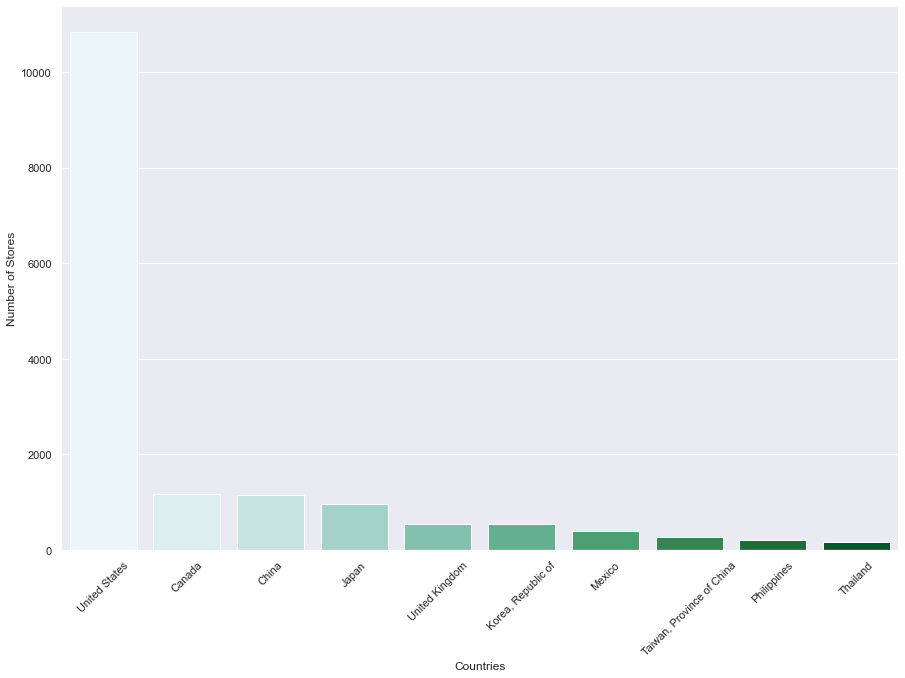

In [176]:
panel2 = plt.figure(figsize=(15,10))

sns.barplot(x=country_names, y=country_values, palette=sns.color_palette('BuGn', n_colors=10))
plt.xticks(rotation= 45)
plt.xlabel('Countries')
plt.ylabel('Number of Stores');

In [ ]:
    df = pd.read_csv('http://s3.amazonaws.com/radius.civicknowledge.com/chrismeller.github.com-starbucks-2.1.1/data/all_starbucks.csv')
# Countries = https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv


In [156]:
list_ten_countries = country_names.tolist()

In [157]:
ten_countries = starbucks.query('country_name in @list_ten_countries')

In [159]:
group_country_ownership = ten_countries.groupby(['country_name', 'ownershiptype'])['brandname'].count().reset_index()
pivot_country_ownership = pd.pivot_table(group_country_ownership, values='brandname', index='country_name', columns='ownershiptype', fill_value=0)
pivot_country_ownership

ownershiptype,CO,FR,JV,LS
country_name,,,,
Canada,876,0,0,298
China,612,0,416,122
Japan,0,0,912,42
"Korea, Republic of",0,0,539,0
Mexico,0,0,0,387
Philippines,0,0,0,206
"Taiwan, Province of China",0,0,270,0
Thailand,173,0,0,0
United Kingdom,329,50,0,164


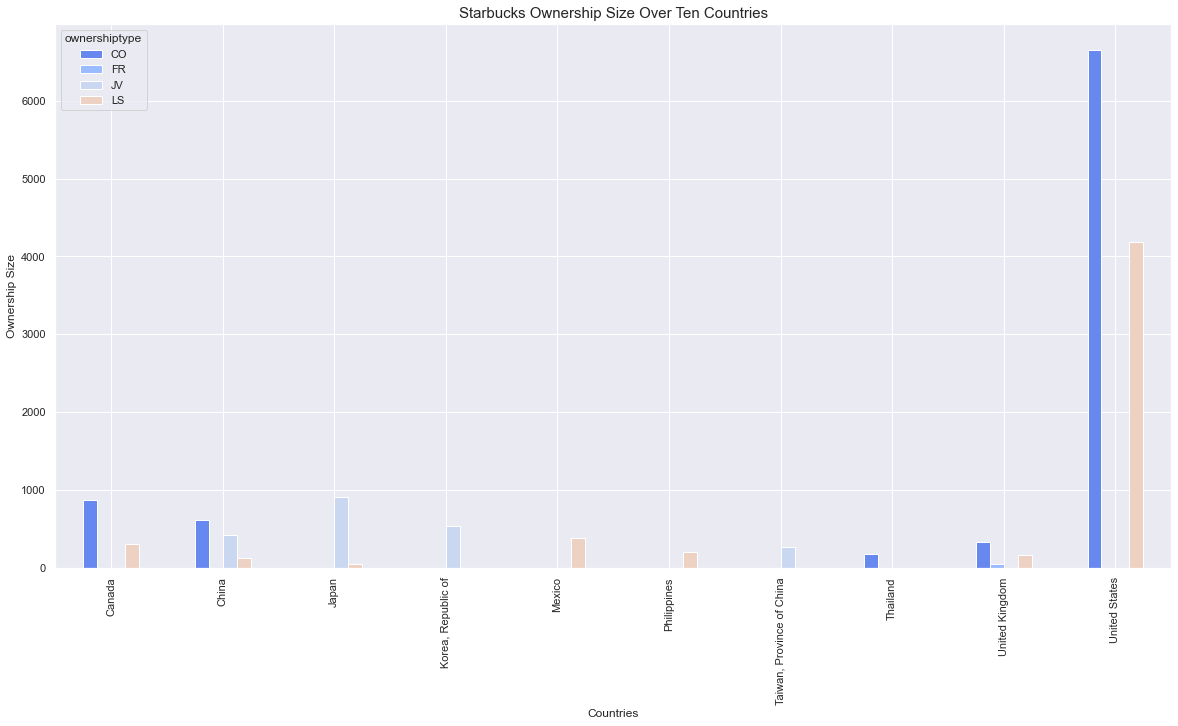

In [177]:
panel1 = sns.set_palette(sns.color_palette('coolwarm'))
pivot_country_ownership.plot(kind='bar',figsize=(20,10))
plt.xlabel('Countries')
plt.ylabel('Ownership Size')
plt.title('Starbucks Ownership Size Over Ten Countries', fontsize=15);

## (1) CO2 emission over time by continent

In [162]:
# # Make DataFrame Pipeline Interactive
# idf = df.interactive()

In [163]:
# # Define Panel widgets
# year_slider = pn.widgets.IntSlider(name='Year slider', start=1750, end=2020, step=5, value=1850)
# year_slider

In [164]:
# # Radio buttons for CO2 measures
# yaxis_co2 = pn.widgets.RadioButtonGroup(
#     name='Y axis', 
#     options=['co2', 'co2_per_capita',],
#     button_type='success'
# )

In [165]:
# continents = ['World', 'Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

# co2_pipeline = (
#     idf[
#         (idf.year <= year_slider) &
#         (idf.country.isin(continents))
#     ]
#     .groupby(['country', 'year'])[yaxis_co2].mean()
#     .to_frame()
#     .reset_index()
#     .sort_values(by='year')  
#     .reset_index(drop=True)
# )

In [166]:
# co2_pipeline

In [167]:
# co2_plot = co2_pipeline.hvplot(x = 'year', by='country', y=yaxis_co2,line_width=2, title="CO2 emission by continent")
# co2_plot

## (2) Table - CO2 emission over time by continent 

In [168]:
# co2_table = co2_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
# co2_table

## (3) CO2 vs GDP scatterplot

In [169]:
# co2_vs_gdp_scatterplot_pipeline = (
#     idf[
#         (idf.year == year_slider) &
#         (~ (idf.country.isin(continents)))
#     ]
#     .groupby(['country', 'year', 'gdp_per_capita'])['co2'].mean()
#     .to_frame()
#     .reset_index()
#     .sort_values(by='year')  
#     .reset_index(drop=True)
# )

In [170]:
# co2_vs_gdp_scatterplot_pipeline

In [171]:
# co2_vs_gdp_scatterplot = co2_vs_gdp_scatterplot_pipeline.hvplot(x='gdp_per_capita', 
#                                                                 y='co2', 
#                                                                 by='country', 
#                                                                 size=80, kind="scatter", 
#                                                                 alpha=0.7,
#                                                                 legend=False, 
#                                                                 height=500, 
#                                                                 width=500)
# co2_vs_gdp_scatterplot

## (4) Bar chart with CO2 sources by continent

In [172]:
# yaxis_co2_source = pn.widgets.RadioButtonGroup(
#     name='Y axis', 
#     options=['coal_co2', 'oil_co2', 'gas_co2'], 
#     button_type='success'
# )

# continents_excl_world = ['Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

# co2_source_bar_pipeline = (
#     idf[
#         (idf.year == year_slider) &
#         (idf.country.isin(continents_excl_world))
#     ]
#     .groupby(['year', 'country'])[yaxis_co2_source].sum()
#     .to_frame()
#     .reset_index()
#     .sort_values(by='year')  
#     .reset_index(drop=True)
# )

In [173]:
# co2_source_bar_plot = co2_source_bar_pipeline.hvplot(kind='bar', 
#                                                      x='country', 
#                                                      y=yaxis_co2_source, 
#                                                      title='CO2 source by continent')
# co2_source_bar_plot

## Creating Dashboard

In [182]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='Starbucks Overview', 
    sidebar=[pn.pane.Markdown("# CO2 Emissions and Climate Change"), 
             pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."), 
             pn.pane.PNG('starbucks.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(panel1))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable();

In [ ]:
# #Layout using Template
# template = pn.template.FastListTemplate(
#     title='Starbucks Overview', 
#     sidebar=[pn.pane.Markdown("# CO2 Emissions and Climate Change"), 
#              pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."), 
#              pn.pane.PNG('starbucks.png', sizing_mode='scale_both'),
#              pn.pane.Markdown("## Settings"),   
#              year_slider],
#     main=[pn.Row(pn.Column(yaxis_co2, 
#                            co2_plot.panel(width=700), margin=(0,25)), 
#                  co2_table.panel(width=500)), 
#           pn.Row(pn.Column(co2_vs_gdp_scatterplot.panel(width=600), margin=(0,25)), 
#                  pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=600)))],
#     accent_base_color="#88d8b0",
#     header_background="#88d8b0",
# )
# # template.show()
# template.servable();